# Activity 8.01
Import the required Libraries

In [1]:
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


Initiate the Model

In [2]:
classifier = VGG16()
classifier.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Load the Image

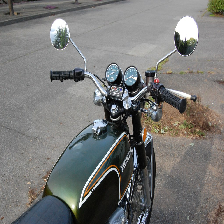

In [11]:
new_image = image.load_img('../Data/Prediction/test_image_1.jpg', target_size=(224, 224))
new_image

Change the image to array

In [12]:
transformed_image = image.img_to_array(new_image)
transformed_image.shape

(224, 224, 3)

Expand the tranfromed image with 4th Dimension

In [13]:
transformed_image = np.expand_dims(transformed_image, axis=0)
transformed_image.shape

(1, 224, 224, 3)

Preprocess the Image

In [14]:
transformed_image = preprocess_input(transformed_image)
transformed_image

array([[[[-6.3939003e+01, -7.4778999e+01, -7.3680000e+01],
         [-2.1939003e+01, -3.5778999e+01, -3.8680000e+01],
         [-6.3939003e+01, -7.3778999e+01, -8.2680000e+01],
         ...,
         [-6.0939003e+01, -1.3778999e+01, -3.1680000e+01],
         [-7.0939003e+01, -2.2778999e+01, -4.3680000e+01],
         [-4.9939003e+01, -2.7789993e+00, -2.0680000e+01]],

        [[-2.4939003e+01, -3.3778999e+01, -3.9680000e+01],
         [-2.4939003e+01, -3.7778999e+01, -4.4680000e+01],
         [-2.9939003e+01, -3.9778999e+01, -4.8680000e+01],
         ...,
         [-6.7939003e+01, -1.8778999e+01, -3.7680000e+01],
         [-6.9939003e+01, -1.9778999e+01, -4.2680000e+01],
         [-7.7939003e+01, -2.8778999e+01, -4.9680000e+01]],

        [[-3.4939003e+01, -4.2778999e+01, -5.1680000e+01],
         [-2.3939003e+01, -3.3778999e+01, -4.2680000e+01],
         [-2.5939003e+01, -3.6778999e+01, -4.3680000e+01],
         ...,
         [-8.5939003e+01, -4.2778999e+01, -6.0680000e+01],
         [

Create a predictor variable

In [15]:
y_pred = classifier.predict(transformed_image)
y_pred

array([[4.47333122e-07, 1.20946552e-07, 2.04147545e-06, 2.52621180e-06,
        6.90441425e-07, 7.73563841e-07, 2.69352967e-08, 9.62914100e-07,
        6.33308375e-08, 6.05552808e-09, 2.51603876e-08, 9.76482681e-08,
        9.47899537e-09, 4.40654730e-08, 4.79781761e-08, 1.10820743e-07,
        2.04076400e-07, 4.44985687e-07, 1.60248101e-06, 6.54645405e-08,
        9.36074329e-08, 2.09197353e-08, 1.36711648e-07, 6.79247250e-07,
        3.08072252e-08, 1.54558663e-07, 7.95182942e-09, 5.78766723e-09,
        1.74166360e-07, 1.18604691e-08, 7.84424614e-08, 2.26142323e-08,
        2.74102891e-08, 1.43111308e-07, 3.23035920e-06, 1.86695772e-07,
        5.57133092e-07, 3.49134872e-08, 1.87623090e-08, 1.51712968e-07,
        5.65604736e-08, 5.61646516e-08, 6.08605362e-08, 7.24316562e-09,
        2.91796027e-08, 1.61771148e-08, 4.54049882e-08, 1.36796743e-08,
        2.08325321e-08, 5.60503537e-08, 1.11806507e-07, 5.85347323e-07,
        6.61164279e-08, 3.45125919e-08, 4.91632761e-08, 4.128749

Check the shape of the array

In [16]:
y_pred.shape

(1, 1000)

Make the predictions

In [17]:
from keras.applications.vgg16 import decode_predictions
decode_predictions(y_pred, top=5)

[[('n03785016', 'moped', 0.8433369),
  ('n03791053', 'motor_scooter', 0.14188054),
  ('n03127747', 'crash_helmet', 0.007004856),
  ('n03208938', 'disk_brake', 0.0022349996),
  ('n04482393', 'tricycle', 0.0007717237)]]

Make the predictions in readable form

In [18]:
label = decode_predictions(y_pred)
# retrieve the most likely result, i.e. highest probability
decoded_label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))

moped (84.33%)
